In [2]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

# Loading the training data

In [3]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X = df[attributes].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [4]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [(X_test,y_test),(X_test1,y_test1),
         (X_test2,y_test2)]



# k Nearest Neighbor

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
def show_report(tests):
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for ================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plt.show()


 ===============Results for ================== 

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



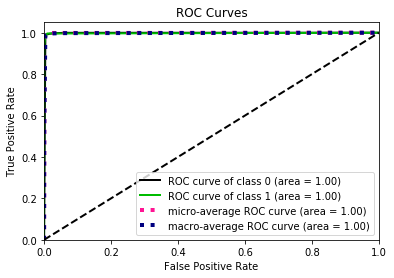


 ===============Results for ================== 

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



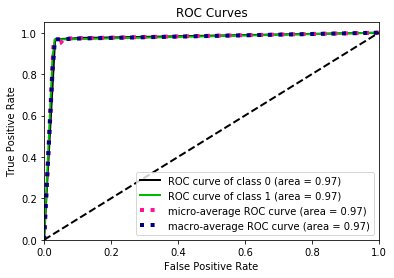


 ===============Results for ================== 

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



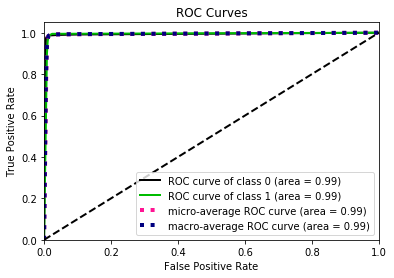

In [8]:
show_report(tests)

### Creating a dictory to store the results of the exp

In [9]:
df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.995838  0.994802  0.995320  1924.000000
1              0.980806  0.984586  0.982692   519.000000
accuracy       0.992632  0.992632  0.992632     0.992632
macro avg      0.988322  0.989694  0.989006  2443.000000
weighted avg   0.992644  0.992632  0.992637  2443.000000
              precision    recall  f1-score      support
0              0.951445  0.972239  0.961729  1693.000000
1              0.949733  0.913580  0.931306   972.000000
accuracy       0.950844  0.950844  0.950844     0.950844
macro avg      0.950589  0.942909  0.946518  2665.000000
weighted avg   0.950821  0.950844  0.950633  2665.000000
              precision    recall  f1-score      support
0              0.994248  0.987278  0.990750  7703.000000
1              0.953400  0.978526  0.965800  2049.000000
accuracy       0.985439  0.985439  0.985439     0.985439
macro avg      0.973824  0.982902  0.978275  9752.000000
weighted avg   0.985665  0.9854

In [10]:
df_report

,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
0,0.995838,0.994802,0.995320,1924.000000,0.951445,0.972239,0.961729,1693.000000,0.994248,0.987278,0.990750,7703.000000
1,0.980806,0.984586,0.982692,519.000000,0.949733,0.913580,0.931306,972.000000,0.953400,0.978526,0.965800,2049.000000
accuracy,0.992632,0.992632,0.992632,0.992632,0.950844,0.950844,0.950844,0.950844,0.985439,0.985439,0.985439,0.985439
macro avg,0.988322,0.989694,0.989006,2443.000000,0.950589,0.942909,0.946518,2665.000000,0.973824,0.982902,0.978275,9752.000000
weighted avg,0.992644,0.992632,0.992637,2443.000000,0.950821,0.950844,0.950633,2665.000000,0.985665,0.985439,0.985508,9752.000000


In [11]:
# this code will delete unwanted things

df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

#df_report.to_excel('/Users/piyush2017/Downloads/res.xlsx')
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.995838,0.994802,0.995320,0.951445,0.972239,0.961729,0.994248,0.987278,0.990750
1,0.980806,0.984586,0.982692,0.949733,0.913580,0.931306,0.953400,0.978526,0.965800
accuracy,0.992632,0.992632,0.992632,0.950844,0.950844,0.950844,0.985439,0.985439,0.985439
